## Sistema logico XOR.
### Solucion con una ANN de 3 capas.

Regresemos al XOR. Recuerden que este modelo no funciono con el modelo de McCulloch-Pits

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ xor } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |



La salida de este sistema logico (XOR) la definimos como


\begin{eqnarray}
y = \left \{
    \begin{array}{cc}
    1 & \text{ si   } h(\Theta, X) \ge \text{umbral} \\
    0 & \text{ de lo contrario}
    \end{array}
    \right .
\end{eqnarray}

Construimos un modelo (ANN) de 3 capas que resuelve el problema del XOR.



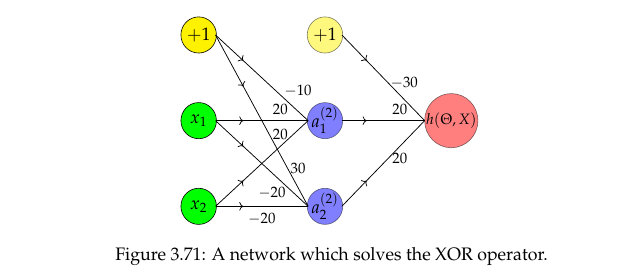

Ojo a la notacion.

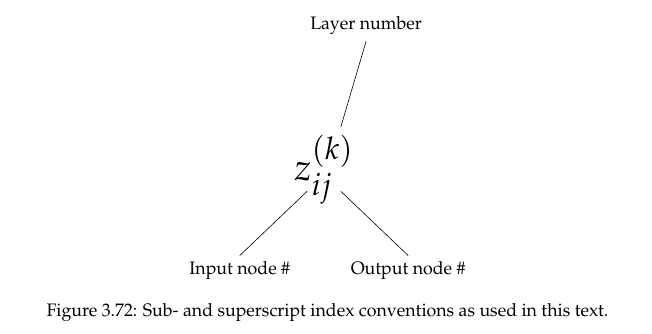


Son cuatro casos:

1. Para $(x_1, x_2)=(1,1) $:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 30 , \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e^{-30}}} \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = -10  \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}}
\approx 0.0000454.
\end{eqnarray}

Vamos para la capa 3


\begin{eqnarray}
z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -9.999092.
\end{eqnarray}

De forma que


$$h(\Theta, x^{(1)}) = S(z_{11}^{(3)}) = 0.00000454 .$$

Asumimos el umbral $\gamma=0.5$ y con este umbral obtenemos

$$\biggl .  y \biggr |_{(1,1)} = 0 .$$

2. Segundo caso $(x_1, x_2) = (1, 0)$:\begin{eqnarray}
z_{21}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 , \\
a_{21}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e^{-10}}} \approx 0.999955 \\
z_{22}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 10  \\
a_{22}^{(2)} &=& S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}}
\approx 0.999955.
\end{eqnarray}

Vamos para la capa 3


\begin{eqnarray}
z_{21}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -10
\end{eqnarray}

De forma que


$$h(\Theta, x^{(1)}) = S(z_{21}^{(3)}) = 0.999955 > 0.5$$

Asumimos el umbral $\gamma=0.5$ y con este umbral obtenemos

$$\left .  y \right |_{(1,0)} = 1 .$$



Proxima clase.

* Analizar los caso $(0,1), (0,0)$

Para $(x_1,x_2) = $(0,1)$

$$z_{31}^{(2)} = -10 + 20 x_1 + 20 x_2 = 10 .$$
$$ a_{31}^{(2)} = S(z_{31}^{(2)} = \frac{1}{1 + \mathrm{e}^{-10}}  \approx 0.9999546021312976 .$$
$$z_{32}^{(2)} = 30 - 20 x_1 - 20 x_2 = 10 .$$
$$ a_{32}^{(2)} = S(z_{32}^{(2)} = \frac{1}{1 + \mathrm{e}^{-10}}  \approx 0.9999546021312976 .$$

$$z_{31}^{(3)} = -30 + 20 a_{32}^{(2)} + 20 a_{22}^{(2)} \approx 0.998184 .$$

La hiptesis
$$h(\Theta, x^{(3)}) = S(z_{31}^{(3)})  \approx 0.99995452 .$$

Umbral es 0.5 de forma que

$$\biggl .   y \biggr |_{(0,1)} = 1.$$


* Ultimo punto (punto 4) $(x_1, x_2) = (0,0)$.


$$z_{41}^{(2)} = -10 + 20 x_1 + 20 x_2 = -10 .$$
$$a_{41}^{(2)} = S(z_{41}) =  \frac{1}{1 + \mathrm{e}^{10}} \approx 0.0000434.$$

$$z_{42}^{(2)} = 30 - 20  x_1 - 20 x_2 = 30 .$$
$$a_{42}^{(2)} = S(z_{42}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1$$


$$z_{42}^{(3)} = -30 + 20 a_{41}^{(2)} + 20 a_{42}^{(2)} =  -9.999092 .$$


La hipotesis final es

$$ h(\Theta., x^{(4)}) = S(z_{41}^{(3)}) = S(-9.999092) \approx 0.000045$$


$$\biggl .   y \biggr |_{(0,0)} = 0.$$


* Hacerlo en Python de forma matricial.


* La matriz de entrada se le agregan unos a la primera columna.
* La primera matriz theta $\Theta^{(1)}$.
* La segunda matriz theta $\Theta^{(2)}$.

Tenemos

\begin{eqnarray}
X =
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
\end{pmatrix}
\quad , \quad
\Theta^{(1)} =
\begin{pmatrix}
-10 & 30  \\
20 & -20 \\
20 & - 20
\end{pmatrix}
\quad , \quad
\Theta^{(2)} =
\begin{pmatrix}
-30 \\
20 \\
20
\end{pmatrix}
\end{eqnarray}




\begin{eqnarray}
Z^{(2)} = X \Theta^{(1)} =
\begin{pmatrix}
30 & -10 \\
10 & 10 \\
10 & 10 \\
-10 & 30
\end{pmatrix}
\quad , \quad
A^{(2)} = S(Z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}}
\approx \begin{pmatrix}
1 & 0.0000454 \\
0.99995 & 0.99995 \\
0.99995 & 0.99995 \\
0.0000454 & 1
\end{pmatrix}
\end{eqnarray}

Agregams unos a la primra columna de $A^{(2)}$.


\begin{eqnarray}
A^{(2)} = \begin{pmatrix} 1 & 1 & 0.0000454 \\
1 & 0.99995 & 0.99995 \\
1 & 0.0000454 &  1 \end{pmatrix}
\end{eqnarray}


$$ Z^{(3)} = A^{(2)} \Theta^{(2)} = \begin{pmatrix} -9.9991 \\
9.9982 \\ 9.9982 \\ -9.9991 \end{pmatrix} .$$

Finalmente calculamos la hipotesis


$$h(\Theta , X) = S(Z^{(3)})  = \begin{pmatrix}  0.0000454 \\
0.99995 \\
0.99995 \\
0.0000454
\end{pmatrix} .$$

Aplicando el umbral $\gamma=0.5$ pasan los que sean mayores a 0.5 se quedan los demas.


$$ y = \begin{pmatrix} 0 \\ 1 \\ 1 \\  0 \end{pmatrix} .$$

## Solucion en Python

In [5]:
import numpy as np

def s(x):
    return 1/( 1 + np.exp(-x))


X = np.array( [[ 0,0], [0,1], [1, 0], [1,1]])

n=len(X)

# agregar columna de unos
ones = np.ones( shape=(n,1), dtype='float')
X = np.column_stack( (ones, X))
print("X = \n", X)
Theta1 = np.array( [ [-10,30], [20, -20] , [20, -20]])
print("Theta1 = \n", Theta1)
Theta2 = np.array( [[-30], [20], [20]])
print("Theta2 = \n", Theta2)

X = 
 [[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Theta1 = 
 [[-10  30]
 [ 20 -20]
 [ 20 -20]]
Theta2 = 
 [[-30]
 [ 20]
 [ 20]]


In [7]:
Z1 = X.dot(Theta1)
print("Z1 \n", Z1)
A = s(Z1)

# agregar unos
A = np.column_stack((ones, A))
print("A \n", A)
Z2 = A.dot(Theta2)
print("Z2 \n", Z2)

# hipotesis
H = s(Z2)
print("H = \n", H)



Z1 
 [[-10.  30.]
 [ 10.  10.]
 [ 10.  10.]
 [ 30. -10.]]
A 
 [[1.00000000e+00 4.53978687e-05 1.00000000e+00]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 1.00000000e+00 4.53978687e-05]]
Z2 
 [[-9.99909204]
 [ 9.99818409]
 [ 9.99818409]
 [-9.99909204]]
H = 
 [[4.54391049e-05]
 [9.99954520e-01]
 [9.99954520e-01]
 [4.54391049e-05]]


In [8]:
# aplicamos el umbral para la salida
B= (H > 0.5)
print(B)

[[False]
 [ True]
 [ True]
 [False]]


In [9]:
# en terminos de 0s y 1s
list(map(int,B))

<ipython-input-9-8802b32ae281>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list(map(int,B))


[0, 1, 1, 0]

## Intuicion acerca de las ANN.
No es muy claro que es lo que hay en las capas ocultas.

Veremos dos ejemplos (graficos).

1. Usando la base de datos de MNIST
2. Usando CNN: Convolutional Neural Networks.


Antes de esto,
Les recomiendo el siguiente video

[What is a Neural Network](https://www.youtube.com/watch?v=aircAruvnKk).




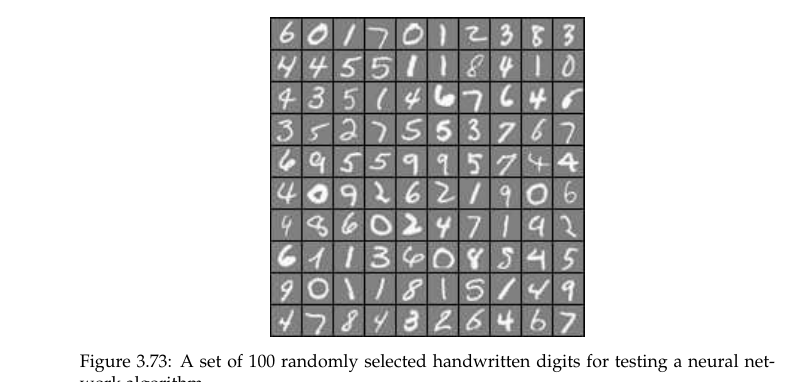

La capa oculta, de esto es:

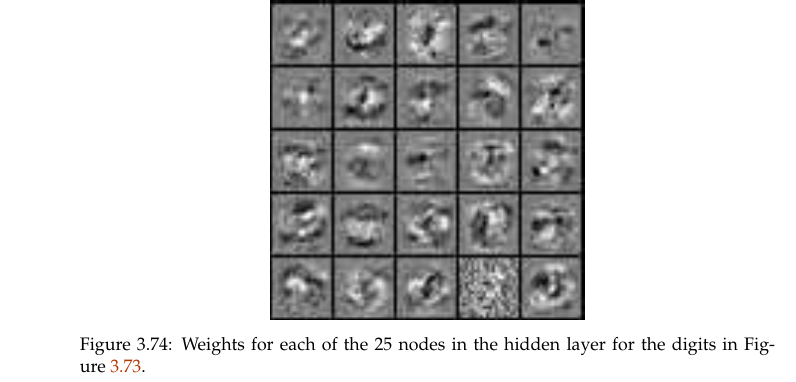

El tema de CNN (Convolutional Neural Netorks)
lo doy en el curso de **deep learning**.

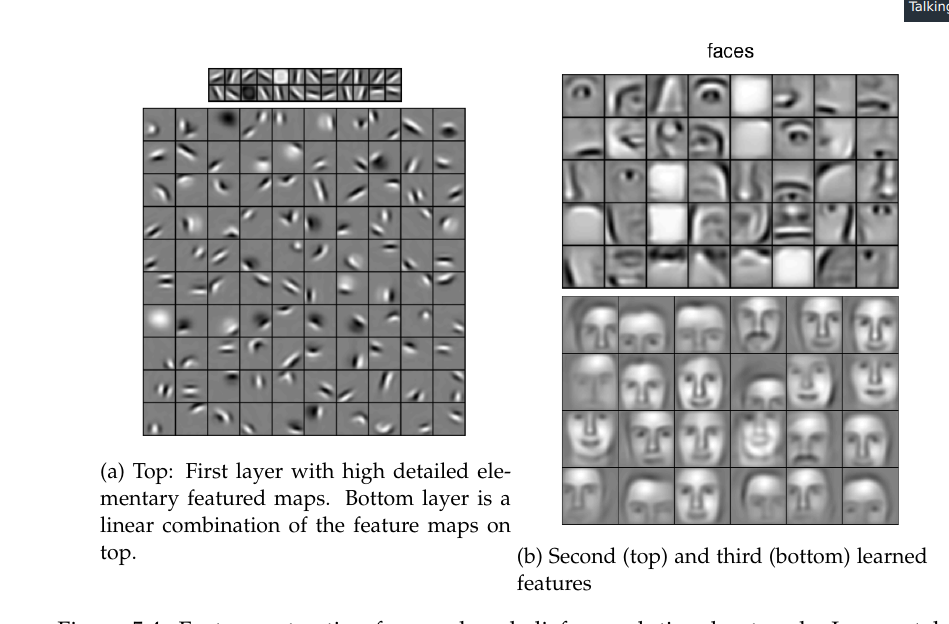

La grafica anterior es del articulo

[convolutional deep belief networks](http://www.cs.toronto.edu/~rgrosse/icml09-cdbn.pdf).




## Funcion de costo .

Recuerde que

$$\Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla J .$$


La funcion de costo que vamos a estudiar es la logistic.


$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}] + \frac{\lambda}{2 m} \sum_{j=1}^n \theta_j^2  .$$

Esta funcion de costo es para un experimento binario. Como extendemos esto a multiclase.

$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log [ h(\theta, x^{(i)}] + (1 - y_i^{(k)}) \log [ 1 - h(\theta, x^{(i)}] + \frac{\lambda}{2 m} \sum_{l=1}^{L}
\sum_{i=1}^{n_j}  \sum_{j=1}^{n_i + 1} (\Theta_{ij}^{(l)})^2 .$$

# Backpropagation: Propagacion hacia atras.